<a href="https://colab.research.google.com/github/dfukagaw28/ColabNotebooks/blob/main/fugashi%E3%81%A7%E3%82%8F%E3%81%8B%E3%81%A1%E6%9B%B8%E3%81%8D_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# fugashi でわかち書き (1)

*   このノートブックでできること
    *   日本語のわかち書きをおこなう
    *   UniDic 辞書を選択することができる

## 準備0. ※最初の一回だけでよい

### 自身の Google ドライブに，UniDic 辞書ファイルへのショートカットを作成する

*   UniDic 辞書を利用するために，次の準備が必要です。
    *   Google ドライブの「マイドライブ（MyDrive）」に「unidic」というディレクトリに辞書を配置してください。
    *   辞書のファイルサイズはそれなりに大きく，ひとつひとつダウンロードするのも大変ですので，以下の手順を参考にして「共有」機能を使ってください。
    *   「ショートカットの追加」の操作については，一度実行すれば十分です。次回からは省略してください。

*   [UniDic](https://clrd.ninjal.ac.jp/unidic/) は国立国語研究所が作成・公開している形態素解析器 MeCab 用の解析用辞書です。
    *   辞書データのライセンスは以下の通りです。
    *   「現代書き言葉 UniDic」「現代話し言葉 UniDic」は [GPL v2.0](https://clrd.ninjal.ac.jp/unidic/copying/GPL)/[LGPL v2.1](https://clrd.ninjal.ac.jp/unidic/copying/LGPL)/[修正BSD](https://clrd.ninjal.ac.jp/unidic/copying/BSD)
    *   古文用 UniDicS（近現代口語小説 UniDic など）は [CC-BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)
*   具体的な手順は，次の「手順」にしたがってください。

### 手順

**Step 1.**  あなたの Google アカウントにログインした状態で，この[共有リンク](https://drive.google.com/drive/folders/18kkMlroYKJDhyXGo5UZpWeNU8IHbYNGs?usp=sharing)を開いてください。

**Step 2.**  「unidic」フォルダのメニューから「整理」＞「ショートカットを追加」を選んでください。

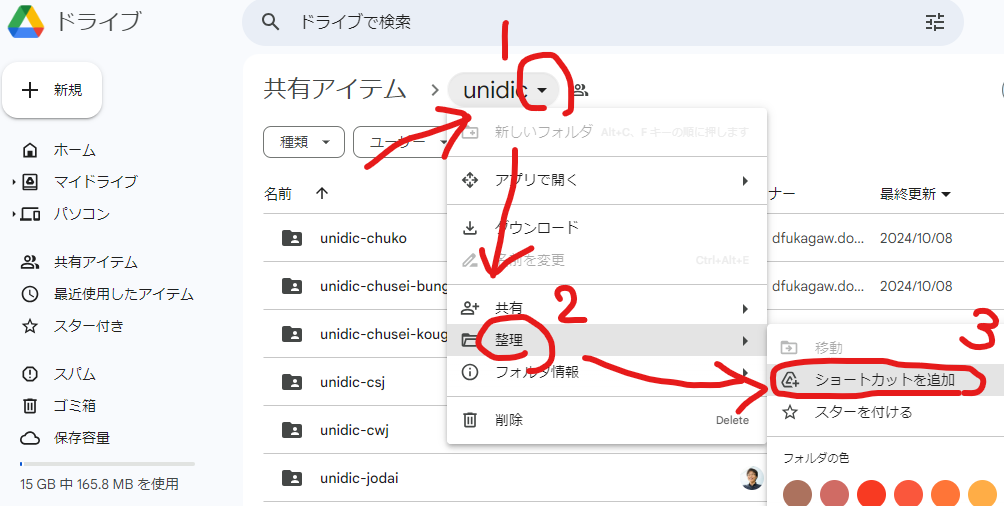

**Step 3.**  ショットカットの追加先として「マイドライブ」を選択してください。

*   「候補」に表示されない場合は「すべての場所」から「マイドライブ」を見つけてから，同じ操作をしてください。

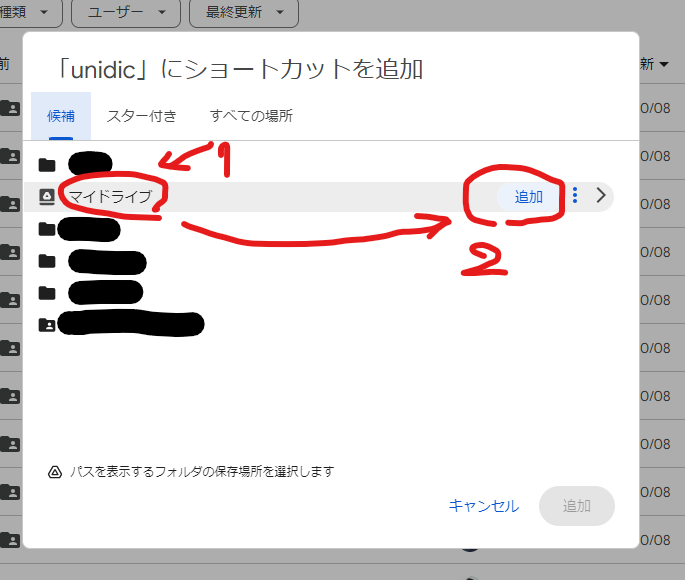

これで共有の設定は完了（のはず）です。

うまくリンクが作成できているかを確かめるために，「マイドライブ」を開いて「unidic」というショートカットが見えることを確認してください。

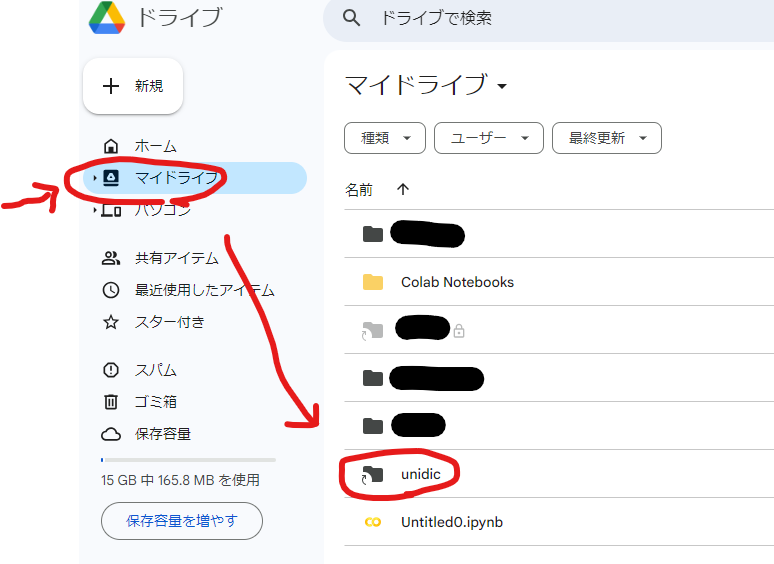

## 準備1. ※Colab のランタイムが削除されるたびに実行する必要がある

In [1]:
#@title 1A. 共有フォルダを Colab で利用できるようにする
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title 1B. 日本語形態素解析器 [fugashi](https://github.com/polm/fugashi) をインストールする

!pip install fugashi

# 辞書を利用するためにダミーファイルを生成する
with open('/usr/local/etc/mecabrc', 'w') as mecabrc:
  mecabrc.write('# This is a dummy file.')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 600.9/600.9 kB 12.0 MB/s eta 0:00:00


## 準備2. テキストデータ

*   次のコードセルを実行してください。
    *   実行する前に，フォームの「テキストファイル」欄の値を確認してください。
    *   デフォルトの設定では，サンプルデータとして『吾輩は猫である』の文章 [neko.txt](https://nlp100.github.io/data/neko.txt)（テキストデータは「言語処理100本ノック」による）を利用します。
    *   「テキストファイル」の値が `http` で始まる場合はインターネットからテキストファイルをダウンロードします。ダウンロードしたファイルの名前は `input.txt` となります（既に存在する場合は上書きされます）。
    *   「テキストファイル」の値が `※ローカルファイルをアップロードする` である場合は，ファイルをアップロードするためのフォームが表示されます。指示に従ってファイルをアップロードしてください。


In [3]:
#@title テキストファイルを取得・設定する

テキストファイル = 'https://nlp100.github.io/data/neko.txt' #@param ['https://nlp100.github.io/data/neko.txt', '※ローカルファイルをアップロードする'] {allow-input:true}
文字コード = 'utf_8' #@param ['utf_8', 'cp932'] {allow-input:true}

input_filename = None
encoding = 文字コード

# テキストファイルを取得・設定する
if テキストファイル == '※ローカルファイルをアップロードする':
  from google.colab import files
  uploaded = files.upload()
  for filename, content in uploaded.items():
    input_filename = filename
    break
elif テキストファイル.startswith('http'):
  !curl -RL {テキストファイル} -o input.txt
  input_filename = 'input.txt'
else:
  input_filename = テキストファイル

# 指定したファイルの名前と内容を確認する
print(f'ファイル名: {input_filename}')
print('ファイルの最初の100文字:')
with open(input_filename, encoding=encoding) as file:
  text = file.read()
  print(text[:100])

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  952k  100  952k    0     0  3071k      0 --:--:-- --:--:-- --:--:-- 3073k
ファイル名: input.txt
ファイルの最初の100文字:
一

　吾輩は猫である。
名前はまだ無い。

　どこで生れたかとんと見当がつかぬ。
何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
吾輩はここで始めて人間というものを見た。



## 準備3. UniDic 辞書を選択する

*   https://clrd.ninjal.ac.jp/unidic/
*   デフォルトは近現代口語小説 UniDic

In [4]:
#@title UniDic 辞書を選択する

from pathlib import Path

UniDic辞書 = 'unidic-novel / 近現代口語小説 UniDic' #@param ['unidic-cwj / 現代書き言葉 UniDic', 'unidic-csj / 現代話し言葉 UniDic', 'unidic-novel / 近現代口語小説 UniDic', 'unidic-qkana / 旧仮名口語 UniDic', 'unidic-kindai-bungo / 近代文語 UniDic', 'unidic-kinsei-edo / 近世江戸口語 UniDic', 'unidic-kinsei-kamigata / 近世上方口語 UniDic', 'unidic-kinsei-bungo / 近世文語 UniDic', 'unidic-chusei-kougo / 中世口語 UniDic', 'unidic-chusei-bungo / 中世文語 UniDic', 'unidic-waka / 和歌 UniDic', 'unidic-chuko / 中古和文 UniDic', 'unidic-jodai / 上代語 UniDic'] {allow-input:true}

dic_name = UniDic辞書.split()[0]
dic_path = f'/content/drive/MyDrive/unidic/{dic_name}'

print(f'選択された辞書: {UniDic辞書}')
print(f'辞書名: {dic_name}')
print(f'辞書パス: {dic_path}')
assert Path(dic_path).exists()

選択された辞書: unidic-novel / 近現代口語小説 UniDic
辞書名: unidic-novel
辞書パス: /content/drive/MyDrive/unidic/unidic-novel


## 形態素解析による分かち書きを実行する

In [5]:
#@title パラメータの設定

出力形式 = 'stem / 語彙素' #@param ['wakati / デフォルトの分かち書き', 'stem / 語彙素'] {allow-input:false}
output_format = 出力形式.split()[0]
print(f'出力形式: {output_format}')

入力ファイル名 = 'input.txt' #@param {type: "string"}
出力ファイル名 = 'output.txt' #@param {type: "string"}
語ごとに改行 = False #@param {type: "boolean"}



#-------- 関数の定義 --------

from fugashi import Tagger
from tqdm import tqdm


def wakati_tagger(input_file, encoding='utf_8'):
  # 形態素解析器を準備する
  tagger = Tagger(f'-Owakati -d {dic_path}')

  # 形態素解析器を実施する
  linebreak = False
  with open(input_file, encoding=encoding) as input_file:
    for line in tqdm(input_file):
      result = tagger.parse(line)
      for word in result.split():
        yield word


def stem_tagger(input_file, encoding='utf_8'):
  # 形態素解析器を準備する
  tagger = Tagger(f'-d {dic_path}')

  # 形態素解析器を実施する
  linebreak = False
  with open(input_file, encoding=encoding) as input_file:
    for line in tqdm(input_file):
      for word in tagger(line):
          # lemma を抽出する
          lemma = word.feature.lemma

          # lemma が存在しない場合（名詞など）は表層形を用いる
          if lemma is None:
            lemma = word.surface

          yield lemma



#-------- 分かち書きを実行する --------
with open(出力ファイル名, 'w', encoding='utf_8') as output_file:
  # tagger を生成する
  if output_format == 'wakati':
    tagger = wakati_tagger(入力ファイル名)
  elif output_format == 'stem':
    tagger = stem_tagger(入力ファイル名)
  else:
    raise ValueError(f'Invalid output format: {output_format}')

  # tagger から語を逐次読み込む
  for word in tagger:
    output_file.write(word)
    output_file.write('\n' if 語ごとに改行 else ' ')



#-------- 出力ファイルをダウンロードする --------
from google.colab import files
files.download('output.txt')

出力形式: stem


9964it [01:12, 136.84it/s] 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>